# Eigenvalues and Eigenvectors

Let's look more closely at why **eigenvectors** are so special. They are vectors whose direction is unchanged by a linear transformation; they are only scaled (stretched or shrunk).

Consider our transformation matrix:  

$ A = \begin{bmatrix} 2 & 1 \\ 0 & 3 \end{bmatrix} $

Let's see how it acts on three different vectors:  

* **Vector 1 (Eigenvector):** $v_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$  

   $ A \cdot v_1 = \begin{bmatrix} 2 & 1 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \end{bmatrix} $  

   The result is $2 \cdot v_1$. The vector stayed on the same line.

* **Vector 2 (Eigenvector):** $v_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$  

   $ A \cdot v_2 = \begin{bmatrix} 2 & 1 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 3 \\ 3 \end{bmatrix} $  

   The result is $3 \cdot v_2$. The vector stayed on the same line.

* **Vector 3 (Not an Eigenvector):** $v_3 = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$  

   $ A \cdot v_3 = \begin{bmatrix} 2 & 1 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} -1 \\ 2 \end{bmatrix} = \begin{bmatrix} 0 \\ 6 \end{bmatrix} $  

   The resulting vector points in a completely different direction.

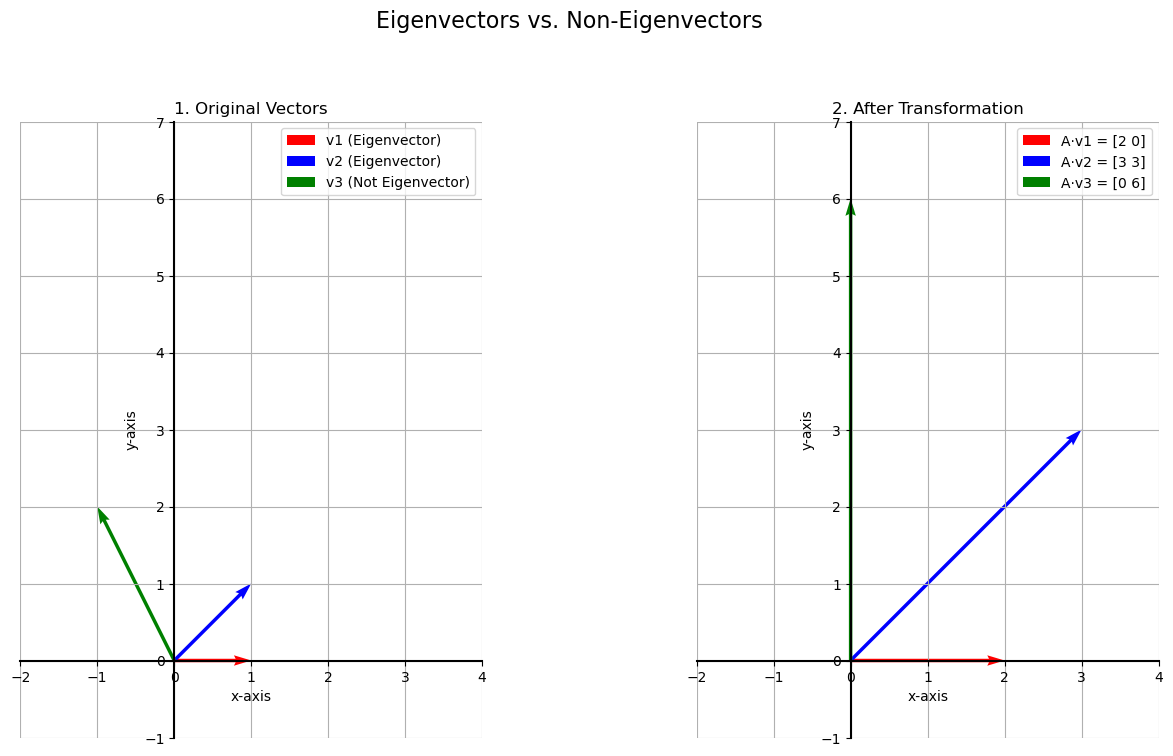

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt

# --- Define the transformation matrix and vectors ---
A = np.array([[2, 1], [0, 3]])
v1 = np.array([1, 0])      # Eigenvector
v2 = np.array([1, 1])      # Eigenvector
v3 = np.array([-1, 2])     # Not an eigenvector

# --- Apply the transformation to each vector ---
v1_transformed = A @ v1
v2_transformed = A @ v2
v3_transformed = A @ v3

# --- Create the plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Eigenvectors vs. Non-Eigenvectors', fontsize=16, y=1.02)

# --- Plot 1: Original Vectors ---
ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red', label='v1 (Eigenvector)')
ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v2 (Eigenvector)')
ax1.quiver(0, 0, v3[0], v3[1], angles='xy', scale_units='xy', scale=1, color='green', label='v3 (Not Eigenvector)')
ax1.set_title('1. Original Vectors')

# --- Plot 2: Transformed Vectors ---
ax2.quiver(0, 0, v1_transformed[0], v1_transformed[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'A·v1 = {v1_transformed}')
ax2.quiver(0, 0, v2_transformed[0], v2_transformed[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'A·v2 = {v2_transformed}')
ax2.quiver(0, 0, v3_transformed[0], v3_transformed[1], angles='xy', scale_units='xy', scale=1, color='green', label=f'A·v3 = {v3_transformed}')
ax2.set_title('2. After Transformation')

# --- Format both plots ---
for ax in [ax1, ax2]:
    ax.set_xlim(-2, 4)
    ax.set_ylim(-1, 7)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.grid(True)
    ax.legend()
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

---

## The Formal Definition

This special relationship is captured by the core equation of eigenvectors and eigenvalues. For a given matrix `A`, a vector `v` is an eigenvector if it satisfies this equation for some scalar `λ` (lambda).

> $ A v = \lambda v $  

* **v:** The **eigenvector** (a non-zero vector).
* **λ:** The **eigenvalue** (a scalar).

This equation states that multiplying the matrix `A` by its eigenvector `v` has the exact same effect as just multiplying the vector `v` by a single number, its eigenvalue `λ`.

### The Computational Advantage and a Practical Caveat

The power of this equation is that it allows us to replace an "expensive" matrix multiplication with a "cheap" scalar multiplication, but only for vectors that are eigenvectors.

If we can express any vector as a linear combination of the eigenvectors (using the **eigenbasis**), we can transform it without any matrix multiplication at all.

For example, our vector $v_3 = (-1, 2)$ can be written as a combination of the eigenbasis:  

$ v_3 = -3v_1 + 2v_2 $  

To find its transformation, we can do:  

$ A \cdot v_3 = A \cdot (-3v_1 + 2v_2) $  

$ = -3(A \cdot v_1) + 2(A \cdot v_2) $  

Now we use our shortcut, replacing $A \cdot v$ with $\lambda v$:  

$ = -3(\lambda_1 v_1) + 2(\lambda_2 v_2) $  

$ = -6\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 6\begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 6 \end{bmatrix} $  

This gives us the correct answer using only scalar multiplication.

**However, there is a crucial caveat.** Finding the coordinates of a vector with respect to a new basis (in this case, finding the numbers -3 and 2) is a significant calculation in itself. It requires finding the inverse of the eigenbasis matrix and multiplying it by our vector. This is often just as much work as the original matrix multiplication.

The real advantage is not that eigenvectors remove all the work, but that they let you **decide when you want to do the work**. In some machine learning applications, it's worth paying the upfront cost to change all your data into the eigenbasis coordinate system, because you might need to apply the transformation many times later, and each of those subsequent transformations will be much faster.